# Understand Brazilian E-commerce co.



In [1]:
# Import all of the libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
import matplotlib as mpl
import plotly.plotly as py
import plotly.tools as tls

mpl.rcParams['patch.force_edgecolor'] = True
%matplotlib inline
import datetime as dt

In [2]:
ls

EDA.ipynb                              olist_order_payments_dataset.csv*
README.md                              olist_order_reviews_dataset.csv*
Untitled.ipynb                         olist_orders_dataset.csv*
brazilian-ecommerce/                   olist_products_dataset.csv*
combined_csv.ipynb                     olist_sellers_dataset.csv*
olist_customers_dataset.csv*           product_category_name_translation.csv*
olist_geolocation_dataset.csv*         visualizations.ipynb
olist_order_items_dataset.csv*


In [7]:
customer = pd.read_csv("olist_customers_dataset.csv")              
location = pd.read_csv("olist_geolocation_dataset.csv")
order_items = pd.read_csv("olist_order_items_dataset.csv")
payment = pd.read_csv("olist_order_payments_dataset.csv")
review = pd.read_csv("olist_order_reviews_dataset.csv")
orders = pd.read_csv("olist_orders_dataset.csv")
product = pd.read_csv("olist_products_dataset.csv")
seller = pd.read_csv("olist_sellers_dataset.csv")
product_name = pd.read_csv("product_category_name_translation.csv")



#orders.isnull().values.any()

orders.isnull().sum()


order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [46]:
stat_cat = orders['order_status'].unique().tolist()
stat_cat

['delivered',
 'invoiced',
 'shipped',
 'processing',
 'unavailable',
 'canceled',
 'created',
 'approved']

In [47]:
status_cat = pd.Categorical(orders['order_status'], categories=stat_cat, ordered=False)
status_cat
                           

[delivered, delivered, delivered, delivered, delivered, ..., delivered, delivered, delivered, delivered, delivered]
Length: 99441
Categories (8, object): [delivered, invoiced, shipped, processing, unavailable, canceled, created, approved]

In [48]:
#reassign status_cat to original "order_Status col
orders['order_status'] = status_cat

In [6]:


#do the same to product_name_category

cat_name = product['product_category_name'].unique().tolist()
product['product_category_name'] = pd.Categorical(product['product_category_name'], categories=cat_name, ordered=False)
product['product_category_name'].describe()




ValueError: Categorial categories cannot be null

In [8]:
#capitalize first character of each word
customer['customer_city'] = customer['customer_city'].str.title()
customer['customer_state'] = customer['customer_state'].str.upper()
customer['customer_state'].value_counts().head(7)

SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
Name: customer_state, dtype: int64

In [15]:
review['review_comment_title'] = review['review_comment_title'].str.strip().str.lower()

In [16]:
product['product_category_name']

'artes'

In [17]:
#replace underline w/ spaces
product['product_category_name'] = product['product_category_name'].str.replace('_',' ').str.lower()
product['product_category_name'].value_counts().head(13)

cama mesa banho           3029
esporte lazer             2867
moveis decoracao          2657
beleza saude              2444
utilidades domesticas     2335
automotivo                1900
informatica acessorios    1639
brinquedos                1411
relogios presentes        1329
telefonia                 1134
bebes                      919
perfumaria                 868
papelaria                  849
Name: product_category_name, dtype: int64

In [19]:
to_eng_cat_name = product['product_category_name'].unique().tolist()
to_eng_cat_name[0]

'perfumaria'

In [20]:
#This took me too long to understand.
orders["order_estimated_delivery_date"] = pd.to_datetime(orders["order_estimated_delivery_date"])#make the columns into datetime.
orders["order_delivered_customer_date"] = pd.to_datetime(orders["order_delivered_customer_date"])

orders["duration_in_days"] = (orders["order_estimated_delivery_date"] - orders["order_delivered_customer_date"])/np.timedelta64(1, 'D')
#subtract estimated delivery by actual date received



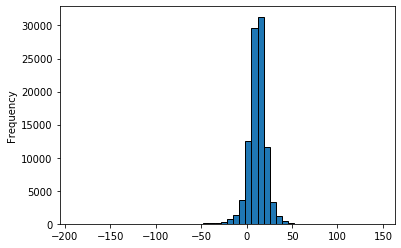

In [22]:
orders['duration_in_days'].plot(kind='hist', bins=50)

In [23]:
orders['on_time'] = ((orders['order_estimated_delivery_date'] - orders['order_delivered_customer_date'])/(np.timedelta64(1, 'D')))


In [28]:
order_items['total_value'] = order_items['price'].add(order_items['freight_value']) #create new column with price & freight included




In [34]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,218.04


# 2. Visualizations

### Data is better understood when it is visualized





In [22]:
order_items['order_item_id'].value_counts().sort_index()

1     98666
2      9803
3      2287
4       965
5       460
6       256
7        58
8        36
9        28
10       25
11       17
12       13
13        8
14        7
15        5
16        3
17        3
18        3
19        3
20        3
21        1
Name: order_item_id, dtype: int64

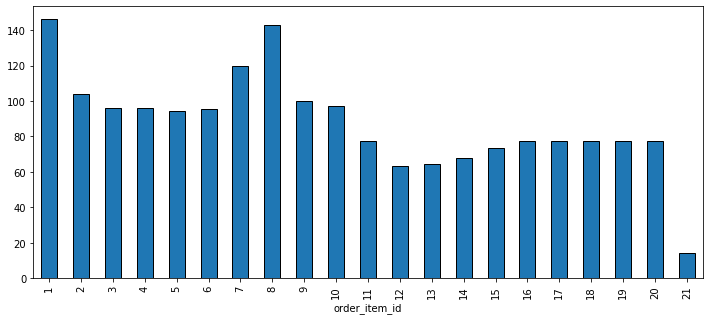

In [23]:
order_items.groupby('order_item_id')['total_value'].mean().plot(kind='bar',figsize=(12,5))




(-1.0999999999999999, 23.099999999999998)

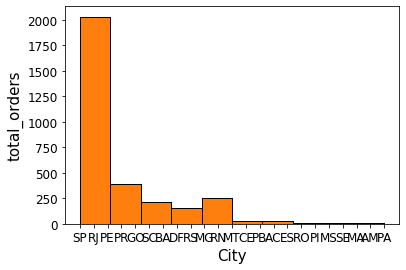

In [24]:
seller['seller_state'].hist(bins=10)
seller['seller_state'].hist(bins=10, grid=False, xlabelsize=12, ylabelsize=12)
plt.xlabel("City", fontsize=15)
plt.ylabel("total_orders",fontsize=15)
plt.xlim()
#most of the orders come from Sao Paolo, nearly 60% of orders come from SP


#seller['seller_state'].describe()
#seller['seller_state'].value_counts()

(0, 600)

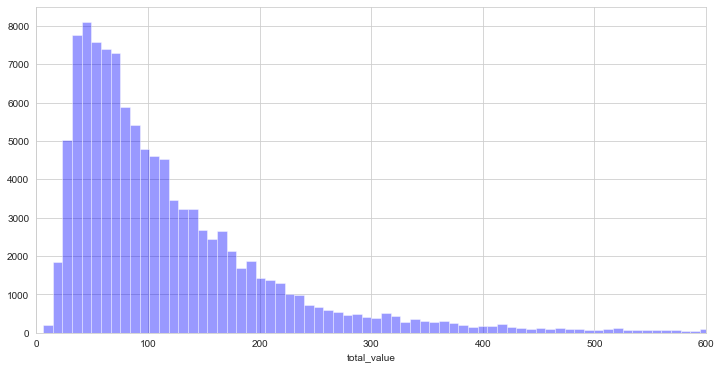

In [38]:
sns.set_style("whitegrid")
plt.figure(figsize=(12,6))
sns.distplot(order_items['total_value'], bins=800 ,kde=False, color='b')
plt.xlim([0, 600])

`As expected, we got right skewed histogram for total_value column - most of the time, people buy cheaply priced goods on olist`

In [ ]:
state_grouped = (customer.groupby('customeer_state')(order_items[['price']')

In [45]:
#customer.head()
order_items.head()
#review.head()


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,218.04


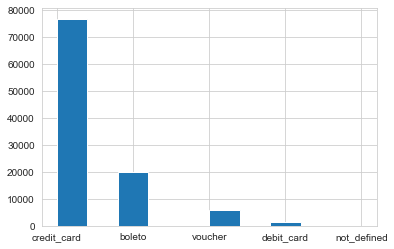

In [55]:
payment['payment_type'].hist(bins=10)
#boleto means check

In [56]:
#payment.payment_type.unique()

payment['payment_type'].value_counts() #frequency of e/ item in a column

credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64

AttributeError: 'tuple' object has no attribute 'imfo'